In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teen_phone_addiction_dataset_noisy.csv")

df.describe(include="all")

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000.000000,3000,2910,3000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2910.000000,3000,2910.000000,3000.000000,2910.000000
unique,NaN,2682,NaN,3,2460,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Richard Smith,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN
freq,NaN,4,NaN,1031,6,525,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,621,NaN,NaN,NaN
mean,1500.500000,NaN,16.094612,NaN,NaN,NaN,5.106210,6.542057,75.445682,5.199752,...,1.014604,84.605354,12.732850,2.523250,1.546379,1.032429,NaN,5.559183,6.074747,8.962396
std,866.169729,NaN,2.370140,NaN,NaN,NaN,2.175749,1.583042,15.595047,3.454915,...,0.503427,42.131456,4.829928,1.031296,0.971286,0.670990,NaN,3.200324,2.144491,1.905388
min,1.000000,NaN,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,750.750000,NaN,14.063936,NaN,NaN,NaN,3.718400,5.487200,62.000000,2.000000,...,0.674237,51.000000,9.000000,1.823647,0.835921,0.530142,NaN,3.000000,4.668098,8.084353
50%,1500.500000,NaN,15.995079,NaN,NaN,NaN,5.012012,6.510024,75.000000,5.000000,...,1.003879,82.000000,13.000000,2.512961,1.505765,0.985774,NaN,5.000000,6.046664,9.869926
75%,2250.250000,NaN,17.929240,NaN,NaN,NaN,6.400018,7.536298,88.000000,8.000000,...,1.369478,116.000000,17.000000,3.176709,2.188618,1.480672,NaN,8.000000,7.401048,10.000000


PRE-PROCESSING DATA

Now we will change the Non numeric values to Numeric values.

In [3]:
for c in df.columns:
    if df[c].dtype == "object":
        df[c] = df[c].astype(str).str.strip()

# ---------- Explicit replacements ----------
# Gender: Male=0, Female=1, Other=2
df.Gender.replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)   # 'Gender' column

# School_Grade: ordinal mapping
df.School_Grade.replace(['7th','8th','9th','10th','11th','12th'],
                        [7, 8, 9, 10, 11, 12], inplace=True)              # 'School_Grade' column

# Phone_Usage_Purpose: categorical mapping
df.Phone_Usage_Purpose.replace(['Education','Browsing','Social Media','Gaming','Other'],
                               [0, 1, 2, 3, 4], inplace=True)             # 'Phone_Usage_Purpose' column

# ---------- High-cardinality text ----------
# Location (many unique values + NaN → numeric codes)
df['Location'] = df['Location'].fillna('Unknown')
df['Location'], location_index = pd.factorize(df['Location'])             # 'Location' column

# Name (many unique values → numeric codes)
df['Name'], name_index = pd.factorize(df['Name'])                         # 'Name' column

# ---------- Summary ----------
print(df.describe(include="all"))
print(df.dtypes)


                ID         Name          Age       Gender     Location  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000  1292.467667    16.094612     0.980333  1136.811000   
std     866.169729   771.535287     2.370140     0.817008   719.737948   
min       1.000000     0.000000    13.000000     0.000000     0.000000   
25%     750.750000   624.750000    14.063936     0.000000   511.750000   
50%    1500.500000  1265.500000    15.995079     1.000000  1099.500000   
75%    2250.250000  1954.250000    17.929240     2.000000  1747.250000   
max    3000.000000  2681.000000    33.805617     2.000000  2460.000000   

       School_Grade  Daily_Usage_Hours  Sleep_Hours  Academic_Performance  \
count   3000.000000        3000.000000  3000.000000           3000.000000   
mean       9.515000           5.106210     6.542057             75.445682   
std        1.714474           2.175749     1.583042             15.595047   
min        7.000000      

C:\Users\deogh\AppData\Local\Temp\ipykernel_12436\454911105.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)   # 'Gender' column
C:\Users\deogh\AppData\Local\Temp\ipykernel_12436\454911105.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [4]:
df.isnull().values.any()

np.True_

In [5]:
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Gender                     0
Location                   0
School_Grade               0
Daily_Usage_Hours          0
Sleep_Hours                0
Academic_Performance       0
Social_Interactions        0
Exercise_Hours             0
Anxiety_Level              0
Depression_Level           0
Self_Esteem               90
Parental_Control           0
Screen_Time_Before_Bed     0
Phone_Checks_Per_Day       0
Apps_Used_Daily            0
Time_on_Social_Media       0
Time_on_Gaming             0
Time_on_Education         90
Phone_Usage_Purpose        0
Family_Communication      90
Weekend_Usage_Hours        0
Addiction_Level           90
dtype: int64

In [6]:
df.isnull().sum().sum()

np.int64(360)

We can see the Dataset has null values. Now we will visualise the null values by heatmap.


VISUALISING NULL VALUES USING HEATMAP

<Axes: >

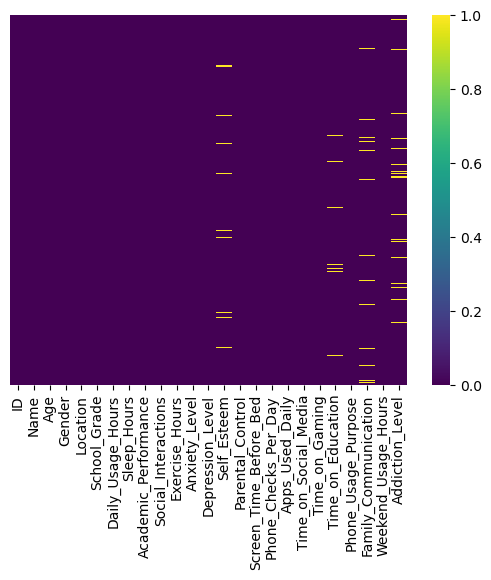

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

C:\Users\deogh\AppData\Local\Temp\ipykernel_12436\1902448045.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,1292.467667,16.094612,0.980333,1136.811000,9.515000,5.106210,6.542057,75.445682,5.199752,...,1.014604,84.605354,12.732850,2.523250,1.546379,1.032975,1.992000,5.562902,6.074747,8.960570
std,866.169729,771.535287,2.370140,0.817008,719.737948,1.714474,2.175749,1.583042,15.595047,3.454915,...,0.503427,42.131456,4.829928,1.031296,0.971286,0.664269,1.428735,3.170146,2.144491,1.886306
min,1.000000,0.000000,13.000000,0.000000,0.000000,7.000000,0.000000,3.000000,50.000000,0.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,624.750000,14.063936,0.000000,511.750000,8.000000,3.718400,5.487200,62.000000,2.000000,...,0.674237,51.000000,9.000000,1.823647,0.835921,0.539256,1.000000,3.000000,4.668098,8.071171
50%,1500.500000,1265.500000,15.995079,1.000000,1099.500000,9.000000,5.012012,6.510024,75.000000,5.000000,...,1.003879,82.000000,13.000000,2.512961,1.505765,0.989867,2.000000,5.458952,6.046664,9.857383
75%,2250.250000,1954.250000,17.929240,2.000000,1747.250000,11.000000,6.400018,7.536298,88.000000,8.000000,...,1.369478,116.000000,17.000000,3.176709,2.188618,1.476983,3.000000,8.000000,7.401048,10.000000
max,3000.000000,2681.000000,33.805617,2.000000,2460.000000,12.000000,21.135083,18.975768,168.569612,28.972808,...,4.196132,382.673086,39.043472,10.310948,8.751409,5.095310,4.000000,29.170107,22.981435,21.416212


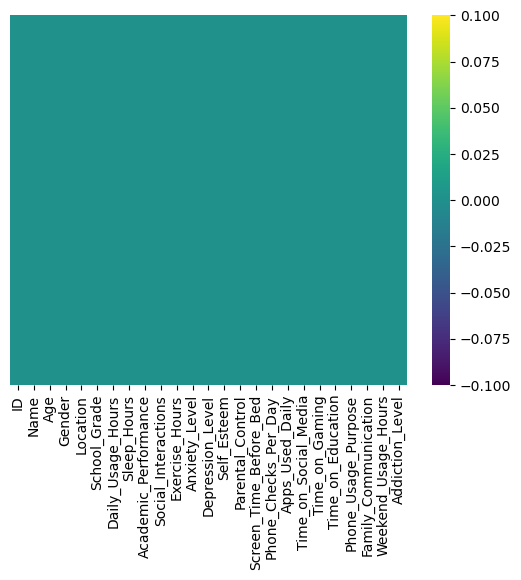

In [8]:
# Handling Null values

# filling null values in 'Gender' with mode value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# filling null values with mean ± std in numerical columns
num_cols = ['Self_Esteem', 'Time_on_Education', 'Family_Communication', 'Addiction_Level']

for col in num_cols:
    avg = df[col].mean()
    std = df[col].std()
    count = df[col].isnull().sum()
    random = np.random.uniform(avg - std, avg + std, size=count)
    df.loc[df[col].isnull(), col] = random

# visualizing null values after imputation
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# optional: describe the dataset
df.describe(include='all')


In [11]:
# correlation of each feature with target
target_corr = df.corr()['Addiction_Level'].sort_values(ascending=False)
print("Correlation with target (Addiction_Level):\n")
print(target_corr)


Correlation with target (Addiction_Level):

Addiction_Level           1.000000
Daily_Usage_Hours         0.460705
Apps_Used_Daily           0.249348
Time_on_Social_Media      0.249002
Time_on_Gaming            0.209275
Phone_Checks_Per_Day      0.184479
Phone_Usage_Purpose       0.025139
Academic_Performance      0.017433
School_Grade              0.009341
Location                  0.009321
Family_Communication      0.007720
Screen_Time_Before_Bed    0.002421
Depression_Level         -0.000320
Anxiety_Level            -0.000577
Age                      -0.002754
ID                       -0.009869
Parental_Control         -0.011588
Gender                   -0.011930
Social_Interactions      -0.014640
Time_on_Education        -0.016098
Name                     -0.017858
Weekend_Usage_Hours      -0.018509
Self_Esteem              -0.024742
Exercise_Hours           -0.034059
Sleep_Hours              -0.184794
Name: Addiction_Level, dtype: float64


Self_Esteem: 10 outliers


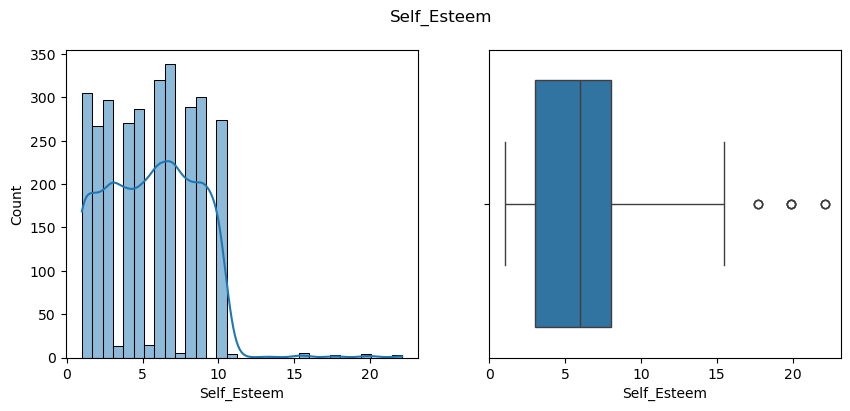

Time_on_Education: 21 outliers


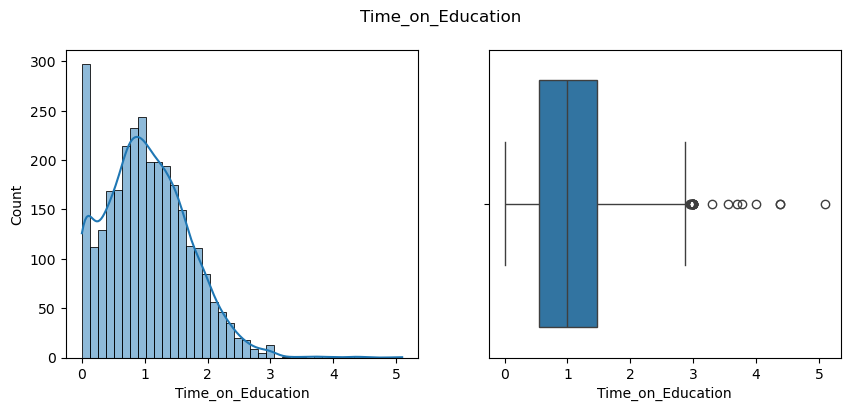

Family_Communication: 15 outliers


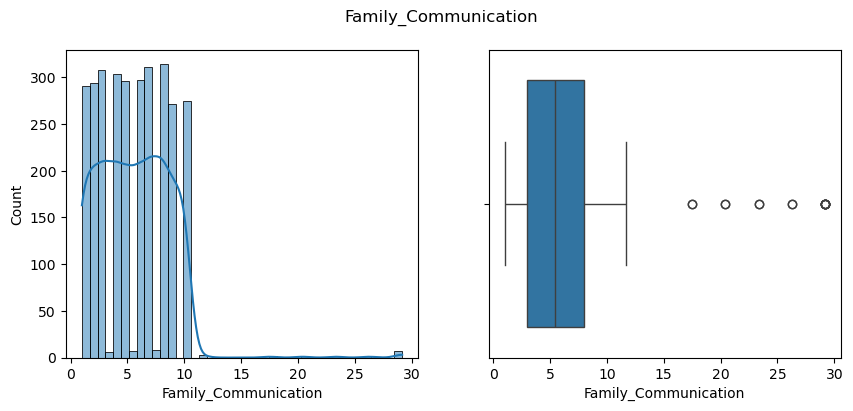

Addiction_Level: 142 outliers


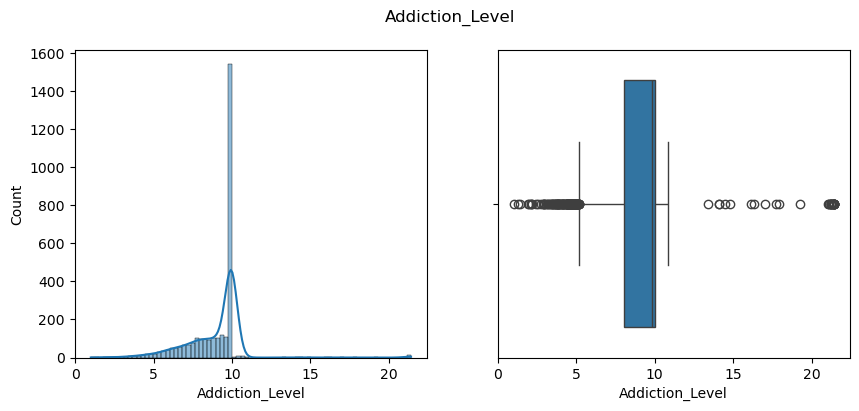

In [13]:
num_cols = ['Self_Esteem', 'Time_on_Education', 'Family_Communication', 'Addiction_Level']

for col in num_cols:
    # Outlier count using IQR
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

    # Plots
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=ax[0])
    sns.boxplot(x=df[col], ax=ax[1])
    plt.suptitle(col)
    plt.show()
